In [17]:
import matplotlib.pylab as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import *
from collections import Counter
from matplotlib import font_manager, rc
from konlpy.tag import Twitter; t = Twitter()
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator
import colorsys
import random
import platform

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


## 키워드 추출

In [4]:
def keyword_count(category):
    ko_con_text = kolaw.open(category).read()
    tokens_ko = t.nouns(ko_con_text)

    stop_words = ['대한', '여러','알', '곳', '더','또한','우리','통해','내', '나','사진','너','응','음' , '사진','알수없음','회원','월','일','년','오후','오전','로','한','와','의','중','가지','안','후','위해','정도','등', '자','를','직','제','저', '이','그','때','및','것이','합니다.','\\n',':','','거','수','그' ,"합","이","있는","있습니다.","것","및","하지만","때문에"]
    tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

    text = ' '.join(tokens_ko)
    text
    f = open(category+".txt", 'w')
    f.write(text)
    f.close()

    ko = nltk.Text(tokens_ko, name= category+' Word cloud')

    data = ko.vocab().most_common(500)
    tmp_data = dict(data)
    
    return tmp_data

### 라이브러리 폴더 안에 존재

In [ ]:
kolaw.fileids()

### 워드 클라우드를 진행할 텍스를 뽑아서 넣기

In [6]:
data = keyword_count("my.txt")
data

{'가능': 7,
 '가사': 5,
 '가입': 6,
 '가장': 49,
 '가치': 15,
 '각': 13,
 '각자': 11,
 '각종': 13,
 '간': 6,
 '값': 34,
 '강화': 8,
 '개': 22,
 '개개인': 6,
 '개론': 7,
 '개발': 20,
 '개발자': 12,
 '개선': 10,
 '개인': 15,
 '개인화': 5,
 '객관': 5,
 '건의': 7,
 '검색': 8,
 '게임': 6,
 '결과': 20,
 '경우': 16,
 '경험': 31,
 '계기': 5,
 '계산': 15,
 '계산기': 24,
 '계속': 20,
 '고객': 18,
 '고등학교': 22,
 '고민': 6,
 '공기업': 7,
 '공부': 34,
 '공유': 8,
 '공항철도': 6,
 '과': 10,
 '과거': 8,
 '과정': 50,
 '관계': 7,
 '관련': 10,
 '관리': 16,
 '관심': 22,
 '교배': 8,
 '교수': 12,
 '교육': 15,
 '구간': 23,
 '구조': 10,
 '구축': 17,
 '구현': 24,
 '그것': 8,
 '그네': 5,
 '그레이': 15,
 '그룹': 9,
 '근무': 11,
 '글': 25,
 '긍': 10,
 '긍정': 12,
 '기간': 16,
 '기계': 48,
 '기능': 8,
 '기도': 5,
 '기록': 6,
 '기반': 36,
 '기본': 8,
 '기사': 5,
 '기술': 45,
 '기업': 31,
 '기여': 22,
 '기재': 9,
 '기존': 15,
 '기준': 7,
 '기초': 11,
 '기획': 19,
 '길': 22,
 '깊이': 10,
 '꿈': 10,
 '끝': 5,
 '나은': 10,
 '난방': 12,
 '날씨': 8,
 '낭비': 6,
 '내용': 28,
 '냉': 15,
 '너무': 8,
 '네이버': 6,
 '네트워크': 18,
 '노력': 8,
 '논': 5,
 '논리': 8,
 '뇌': 22,
 '뉴런': 10,
 '뉴스': 8,
 '능력'

## 워드클라우드 그리기

In [4]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [ ]:

if sys.platform

In [18]:
platform.system()

'Windows'

In [26]:
def make_cloud(tmp_data, back_image_n,state="no", font_n = "UnDinaru.ttf",background_color_n='white', max_font_size_n = 40):
    
    #폰트 지정
    if platform.system() == "Linux":
        #/usr/share/fonts/truetype/unfonts-core/UnDinaru.ttf
        font_path_n = "/usr/share/fonts/truetype/unfonts-core/"+font_n
    elif platform.system() == "Windows":
        #c:/Windows/Fonts/malgun.ttf
        font_path_n = "c:/Windows/Fonts/"+font_n
    elif platform.system() == "Darwin":
        #AppleGothic
        font_path_n = font_n
    else:
        print("Unknwon system")
        return False
    
    font_name = font_manager.FontProperties(fname=font_path_n).get_name()
    rc('font', family=font_name)
    %matplotlib inline
    
    #배경사진 지정
    back_image = np.array(Image.open("image/"+back_image_n))
    image_colors = ImageColorGenerator(back_image)

    
    wordcloud = WordCloud(font_path= font_path_n,
                         relative_scaling = 0.2, mask=back_image,
                         background_color=background_color_n,
                          min_font_size=1, max_font_size=max_font_size_n
                         ).generate_from_frequencies(tmp_data)
    plt.figure(figsize=(30,30))
    
    #설정에 맞게 색깔 변경
    if state == "no":
        plt.imshow(wordcloud)
    elif state == "img":
        plt.imshow(wordcloud.recolor(color_func=image_colors) ,interpolation='bilinear')
    elif state == "grey":
        plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3) ,interpolation='bilinear')
    else:
        plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: state, random_state=3) ,interpolation='bilinear')
    plt.axis("off")
    
    #fig = plt.figure(figsize=(30,30))
    plt.show()
    #fig.savefig('temp2.png', dpi=fig.dpi)

### 워드 클라우드에 추가하고 싶은 내용 기재 
> 숫자가 크면 클 수록 단어가 크게표기

In [7]:
tmp_data = {}
tmp_data["갓기웅"]=100
tmp_data["인공지능"]=150
tmp_data["딥러닝"]=100
tmp_data

{'갓기웅': 100, '인공지능': 150, '딥러닝': 100}

In [8]:
data.update(tmp_data)

### 워드클라우드에서 삭제하고 싶은 내용 삭제

In [9]:
del(data["개"])
del(data["간"])
del(data["각"])

### 표시

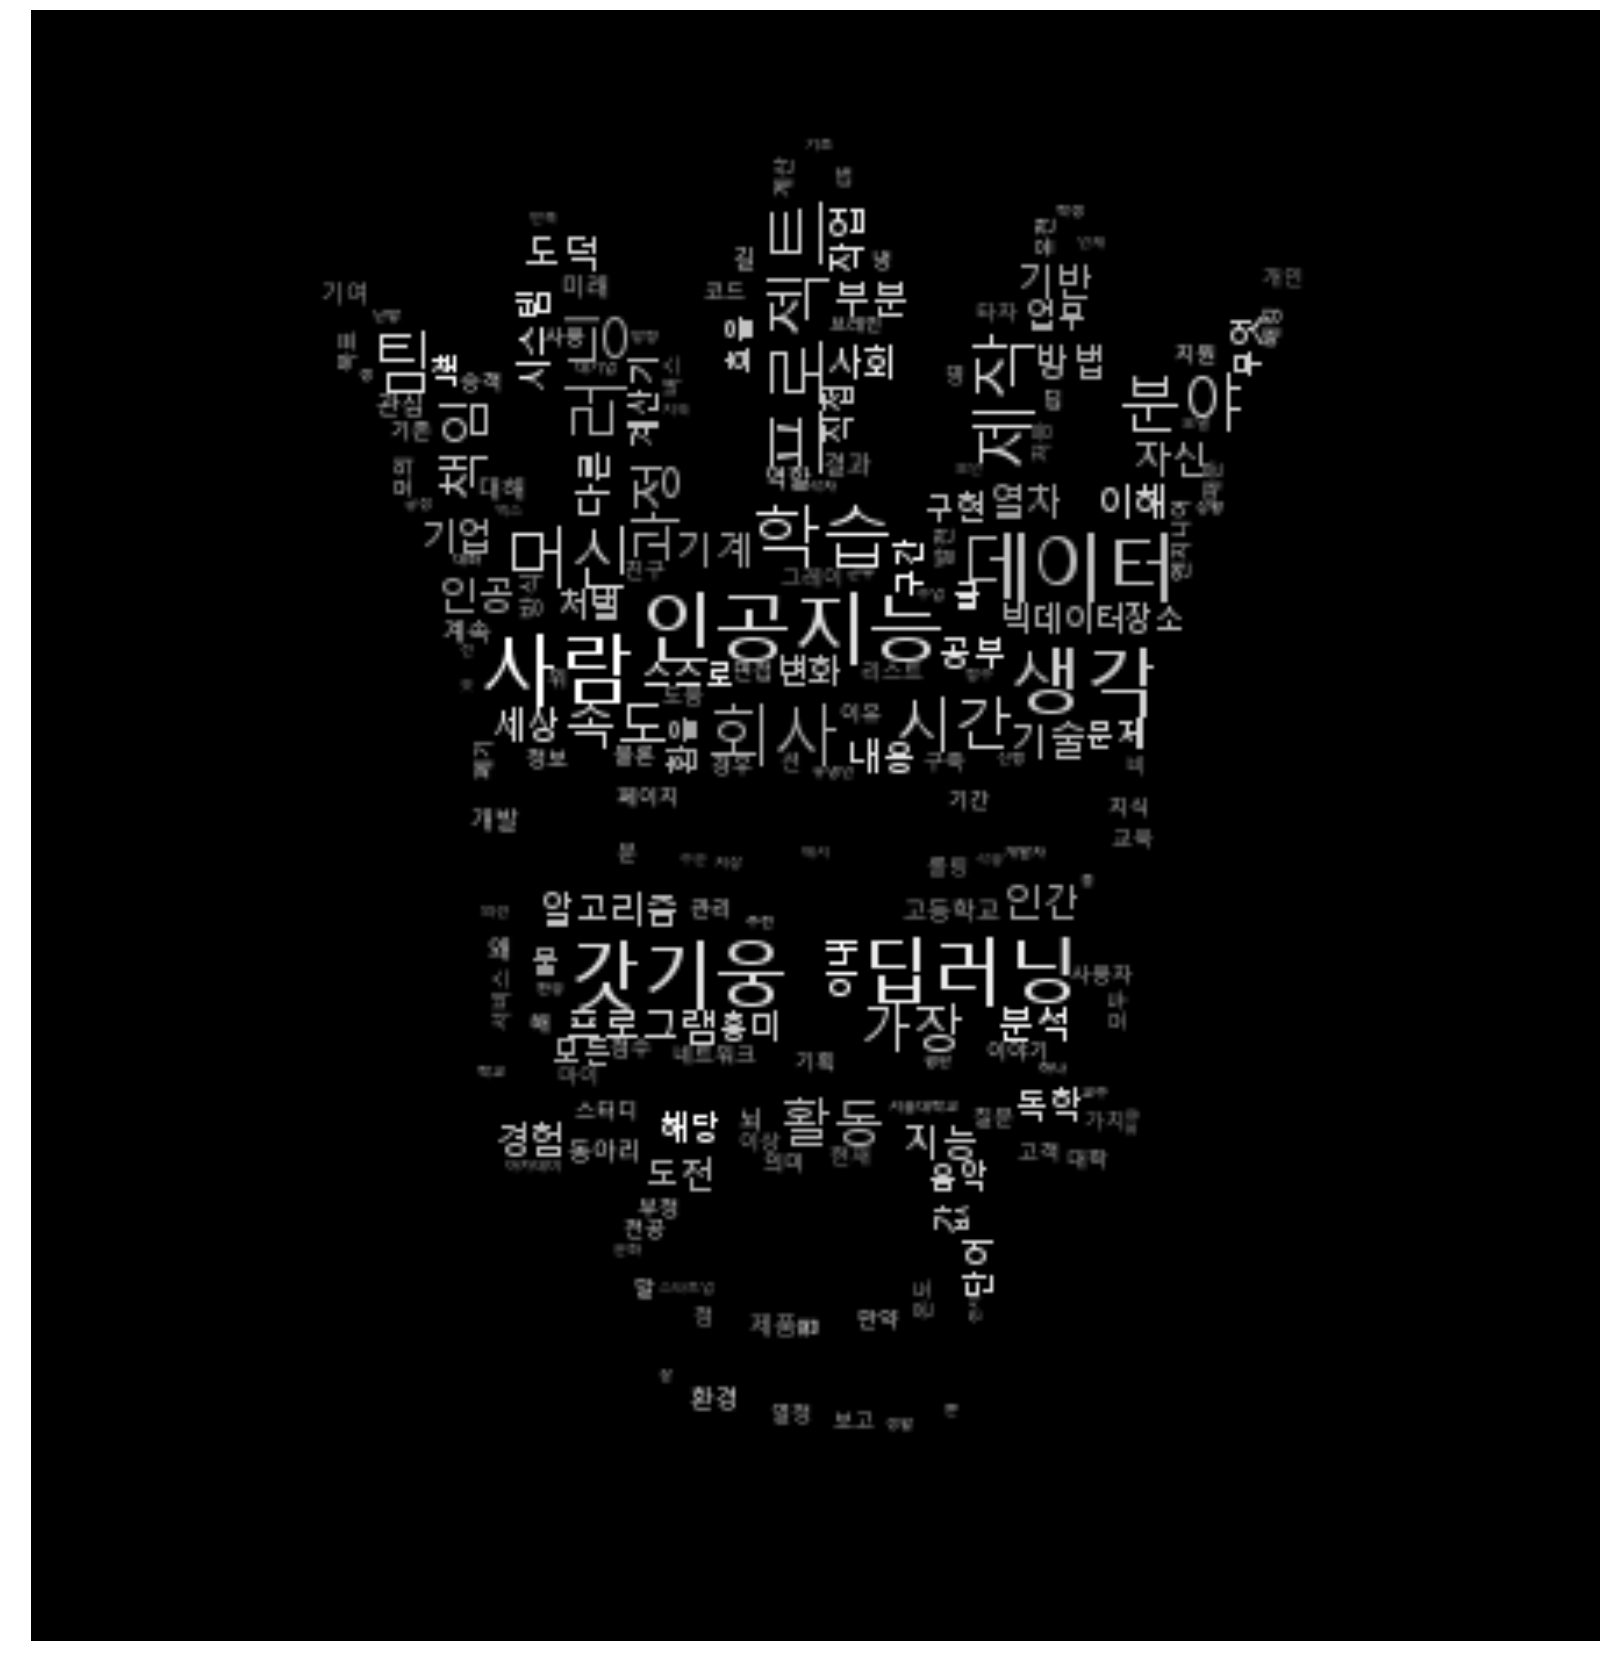

In [28]:
make_cloud(data,back_image_n="skeleton_king.jpg" ,state="grey", background_color_n='black', max_font_size_n = 50, font_n="malgun.ttf")

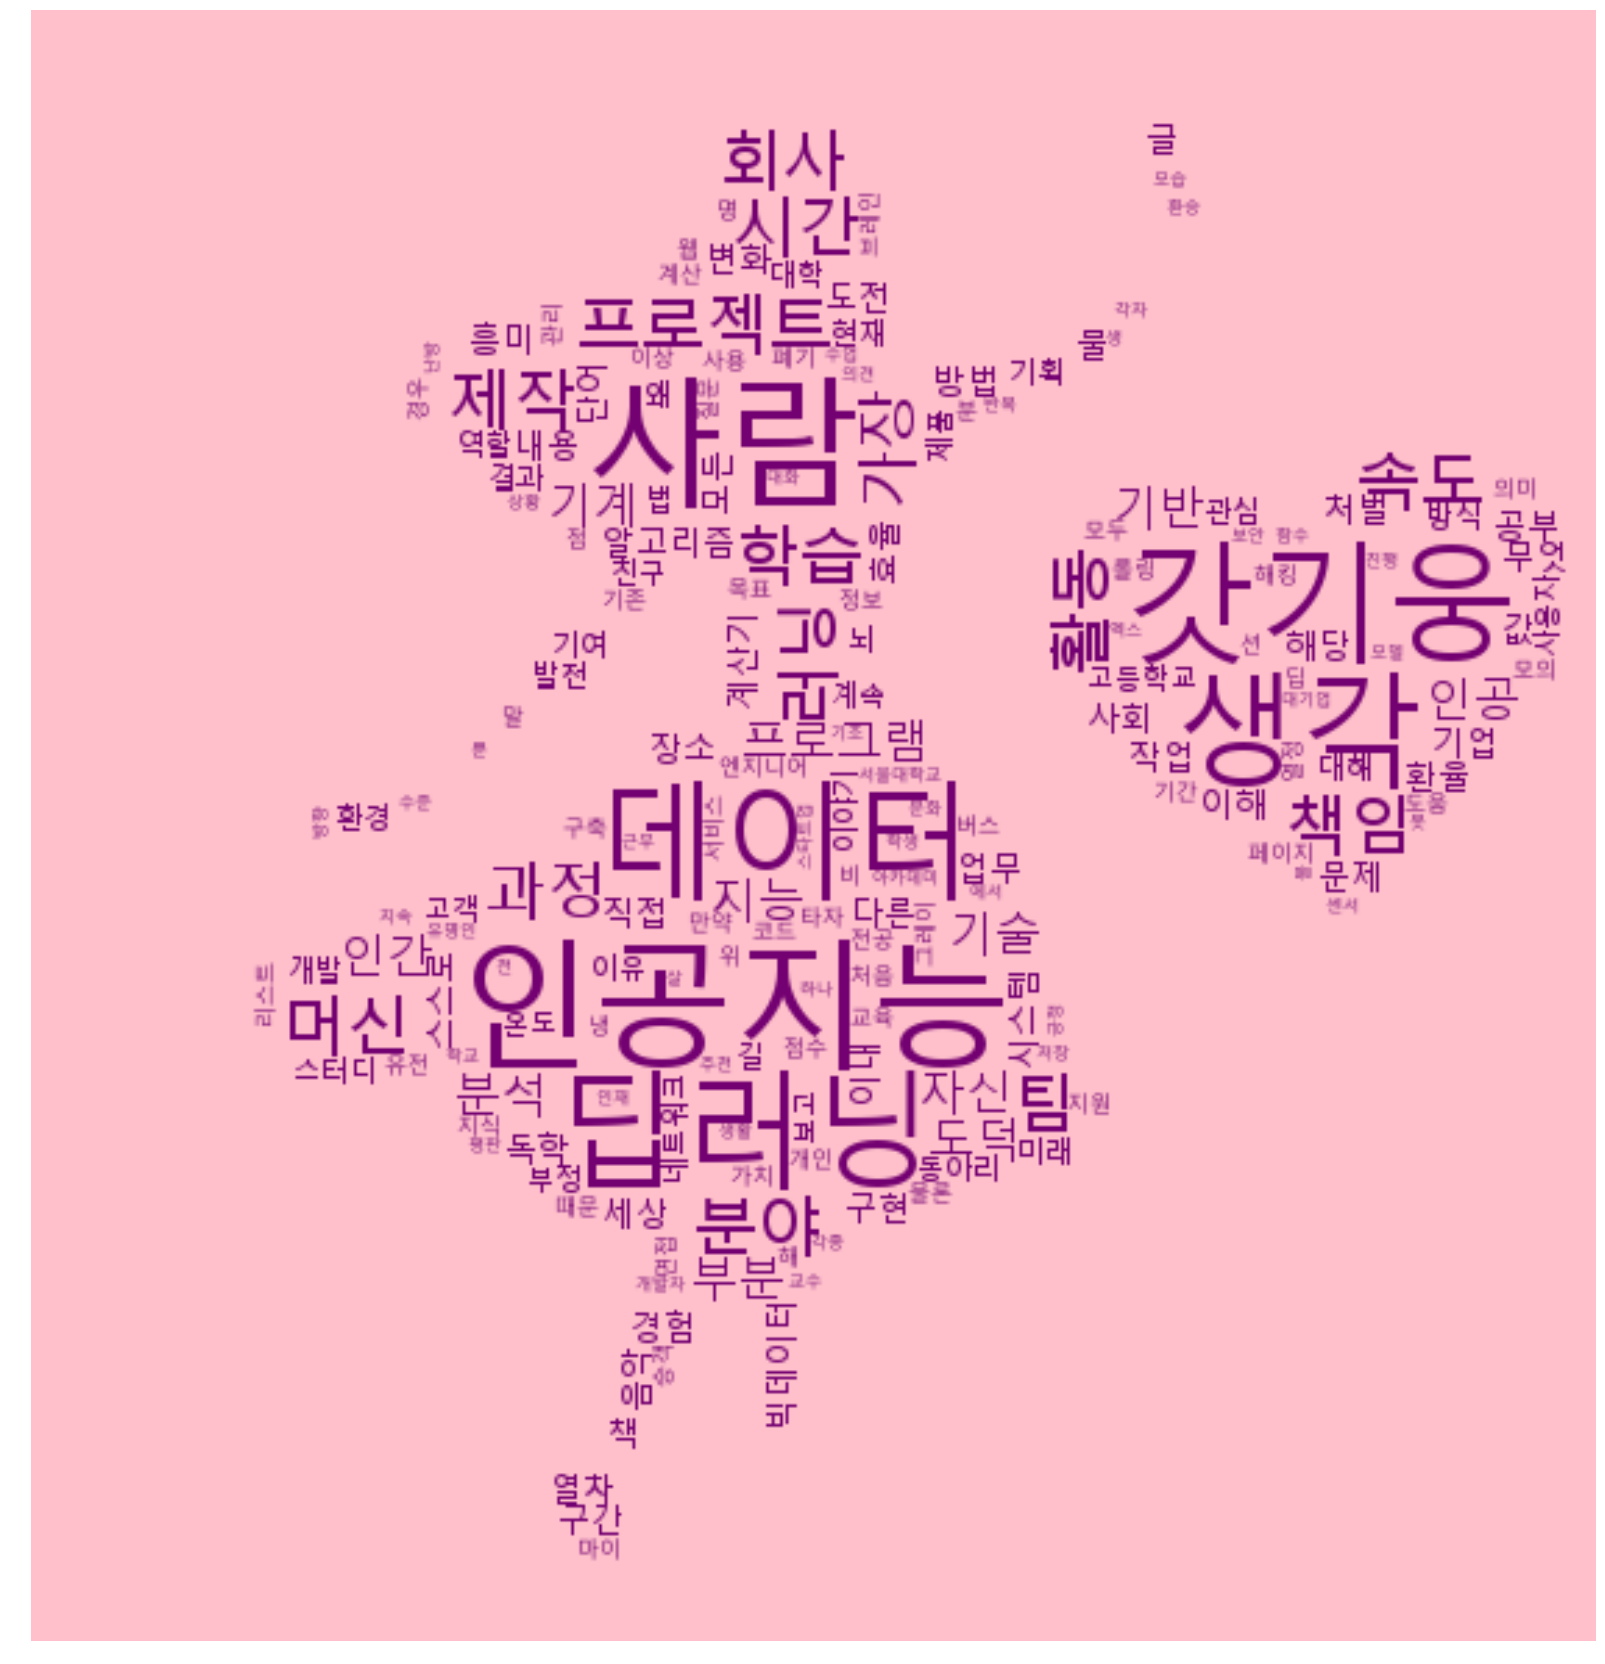

In [29]:
make_cloud(data, back_image_n="heart_alice.png" ,state=(116,1,113), background_color_n='pink', max_font_size_n = 50, font_n="malgun.ttf")

In [47]:
import pandas as pd

In [53]:
data_dict = {"names" : list(data.keys()), "nums" : list(data.values())}
df = pd.DataFrame(data_dict)
df

,names,nums
0,사람,146
1,데이터,98
2,생각,87
3,프로젝트,73
4,제작,72
5,러닝,69
6,학습,63
7,회사,60
8,머신,56
9,팀,55


In [54]:
df.to_csv("data.csv",index=False)